# Data Collection
### Step 1: Installation of the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

### Step 2: Load the dataset

In [2]:
df = pd.read_csv("housePrice.csv")
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [3]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


# Data Preprocessing

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


#### look at address 
we have some None value in this column.
### Step 1:Drop Nan address from dataframe

In [5]:
df = df.dropna(subset = ["Address"])
df.reset_index(drop=True, inplace=True)
df1 = df.copy()

#### 
### Step 2:Change string feature to numeric
make True/False as 0/1 number to be usable in progress

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
input1 = ["Parking","Warehouse","Elevator"]
df1[input1] = df1[input1].apply(le.fit_transform)
df1

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3451,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3452,83,2,1,1,1,Niavaran,6.800000e+09,226666.67
3453,75,2,0,0,0,Parand,3.650000e+08,12166.67
3454,105,2,1,1,1,Dorous,5.600000e+09,186666.67


### Step 3:Understanding Outliers
"ISM" function used to detect and remove outliers in a column of a DataFrame. The function first converts the specified column to floating-point numbers and removes any commas (,). Then, by computing the mean and standard deviation, it uses the 8-standard deviation method to determine the upper and lower bounds for outliers.
#### * In the info cell we found out that Area is not just a numeric data

In [7]:
a = pd.to_numeric(df.Area, errors='coerce')
idx = a.isna()
df[idx]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
569,"3,310,000,000",2,True,True,True,Ostad Moein,3.310000e+09,110333.33
706,"16,160,000,000",3,True,True,True,Pasdaran,1.616000e+10,538666.67
804,"1,000",2,True,True,False,Damavand,7.000000e+09,233333.33
1598,"8,400,000,000",2,True,True,True,Gheitarieh,8.700000e+09,290000.00
2161,"3,600",2,False,False,False,Shahryar,9.720000e+09,324000.00
2788,"2,550,000,000",2,True,True,True,Central Janatabad,2.550000e+09,85000.00


#### * Remove commas and convert to numeric

In [8]:
df1["Area"] = df1["Area"].astype(str).str.replace(',', '').astype(float)

#### * Drop Outliers

In [9]:
def ISM(df, Column_name):
    
    column_data = df [Column_name]
    mean = column_data.mean()
    std_dev = column_data.std()
    threshold = 5 * std_dev
    lower_bound = mean - threshold
    upper_bound = mean + threshold
    outliers = column_data [(column_data < lower_bound) | (column_data > upper_bound)]
    out_temp = outliers.copy()      
    df.drop(out_temp.index, inplace=True)  # Drop rows containing outliers
    df.reset_index(drop=True, inplace=True)  # Reset index to be sequential
    return outliers

In [10]:
out = ISM(df1,"Area")
if len(out) == 0:
    print("We don't have Outliers")
else:
    print("Outliers in the column:")
    print(out)

Outliers in the column:
569     3.310000e+09
706     1.616000e+10
1598    8.400000e+09
2788    2.550000e+09
Name: Area, dtype: float64


# Feature Engineering

### Step 1:sort by Addresses 
we know that the average price in each area of Tehran is different so we want to sort data from cheap to expensive to find the better fit function for our regression.
#### Sort by mean price of each Area

In [11]:
unique_add = df["Address"].unique()
Add = []
Mean = []
for i in unique_add:
    df_temp = df1[df1["Address"] == i]
    mean = (df_temp["Price"]/df_temp["Area"]).mean()
    Add.append(i)
    Mean.append(mean)
per_area = pd.DataFrame({'Address': Add, 'Price': Mean})
per_area = per_area.sort_values(by='Price')
per_area.reset_index(drop=True, inplace=True)
per_area

,Address,Price
0,Malard,4.166667e+06
1,Pishva,4.458333e+06
2,Varamin - Beheshti,4.666667e+06
3,Robat Karim,5.507102e+06
4,Shahedshahr,5.654070e+06
...,...,...
187,Elahieh,1.122126e+08
188,Zaferanieh,1.137139e+08
189,Lavasan,1.172917e+08
190,Vanak,1.274156e+08


#### * we change addresses to numric for use in regression model and drop extra columns

In [12]:
df2 = pd.DataFrame([])
for idx, i in enumerate(per_area["Address"], start=1):
    df_temp = df1[df1['Address'] == i].copy()
    df_temp["Address"] = idx
    df_temp["Price"] = df_temp["Price"]/df_temp["Area"]
    df_temp = df_temp.rename(columns={"Price": "PSM"})
    df_temp = df_temp.drop(["Area", "Price(USD)"], axis=1)
    df2 = pd.concat([df2, df_temp], axis=0)
df2.reset_index(drop=True, inplace=True)
ISM (df2, "PSM")
df2

,Room,Parking,Warehouse,Elevator,Address,PSM
0,2,0,1,0,1,3.333333e+06
1,1,0,0,0,1,5.000000e+06
2,1,0,0,0,2,4.750000e+06
3,2,0,0,0,2,4.166667e+06
4,5,1,1,0,3,4.666667e+06
...,...,...,...,...,...,...
3439,5,1,1,0,190,8.333333e+07
3440,3,0,0,0,190,9.000000e+07
3441,5,1,1,0,190,8.333333e+07
3442,3,1,1,1,191,5.448276e+07


<Axes: >

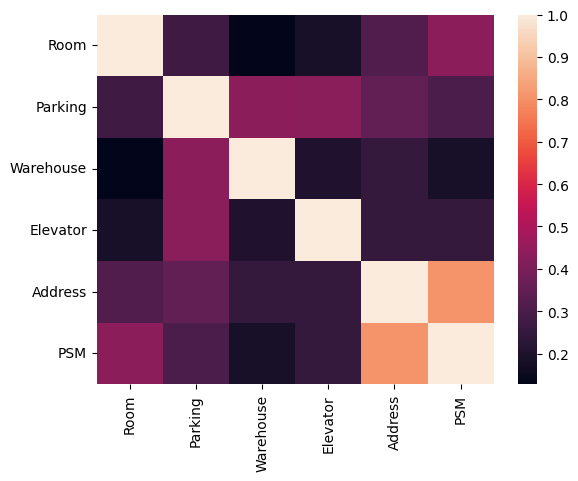

In [13]:
sns.heatmap(df2.corr())

### Address has most effect on price. :)  
and we can see the effect of must of features is less than 0.5 points from 1 but try it next of address effect

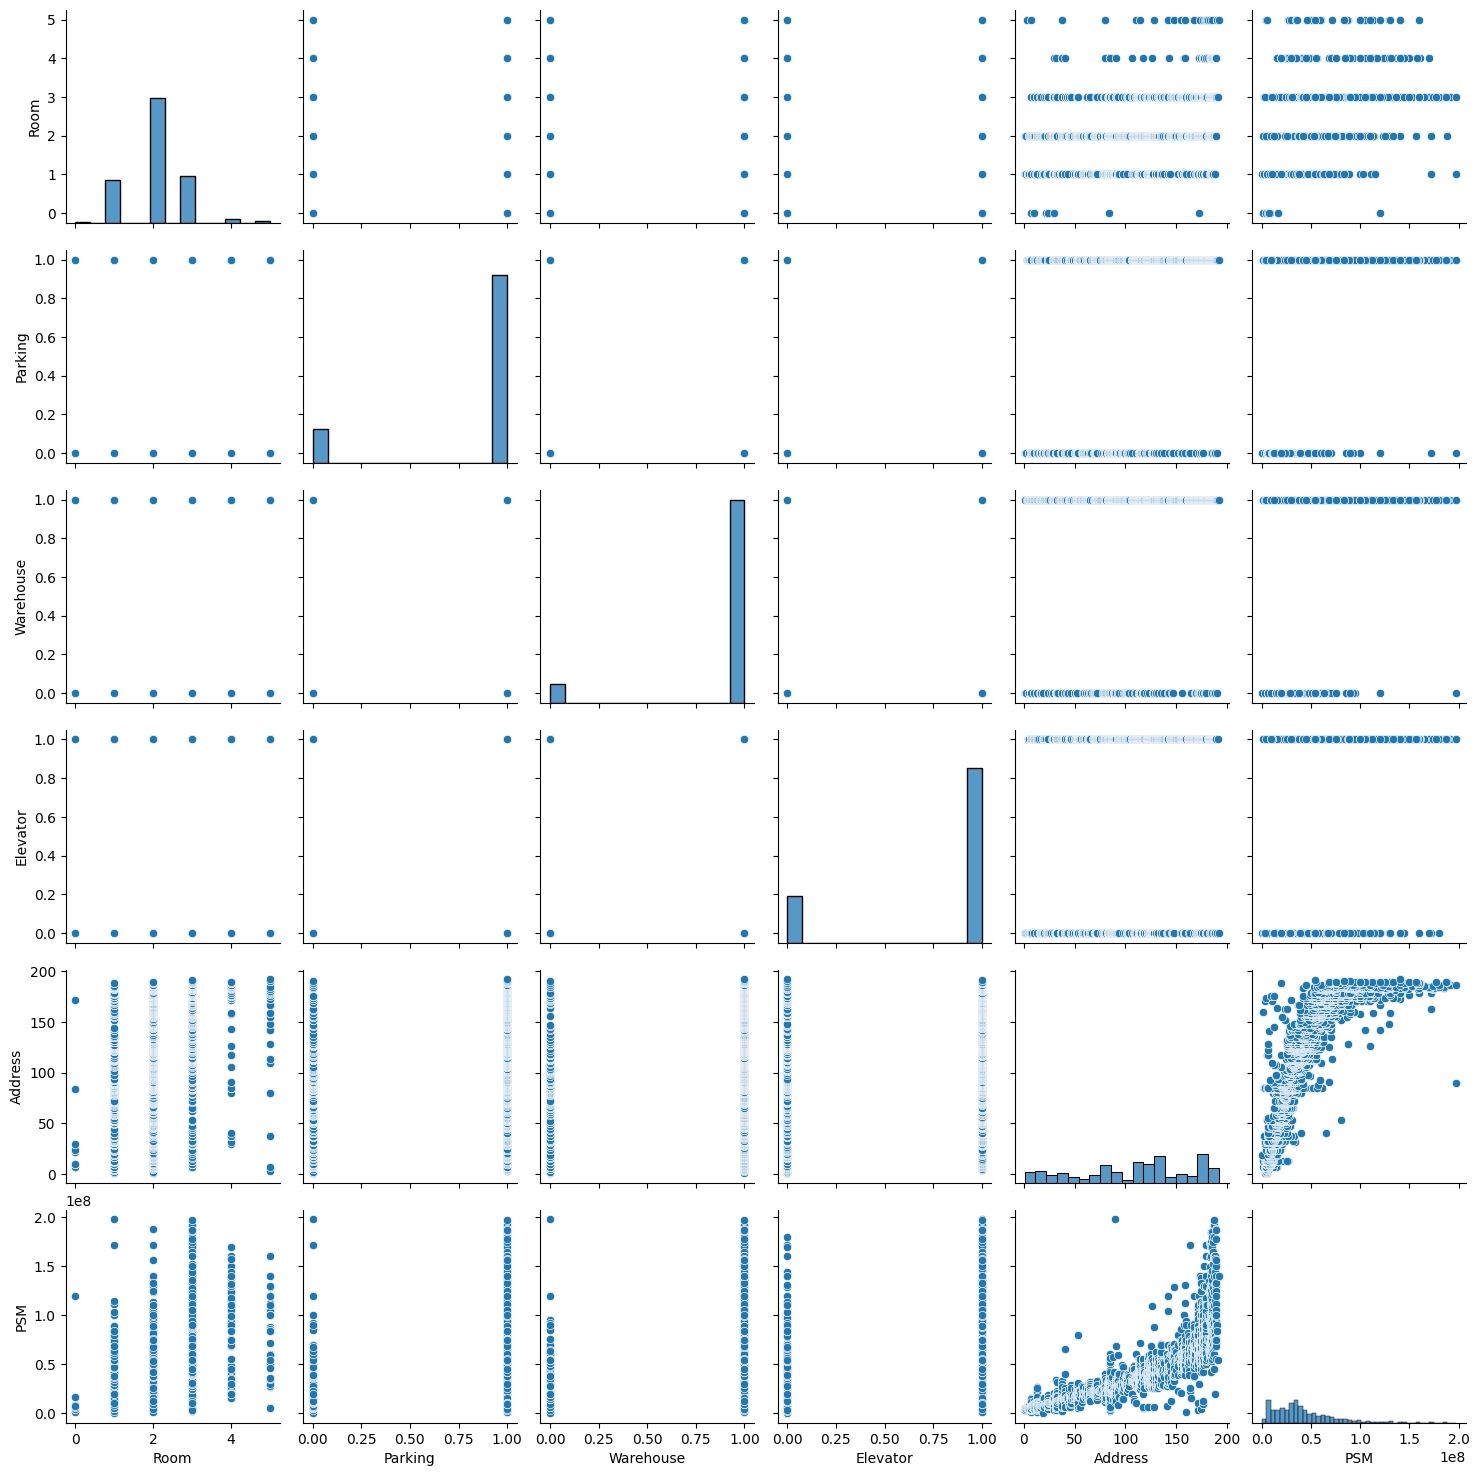

In [14]:
sns.pairplot(df2)

#### * Creating train and test dataset

In [15]:
msk = np.random.rand(len(df2)) < 0.8
train = df2[msk]
test = df2[~msk]

# Simple Regression Model
## Address Effect
first of all we try to found a regression for house price per area that we use price per square meter for 192 area 

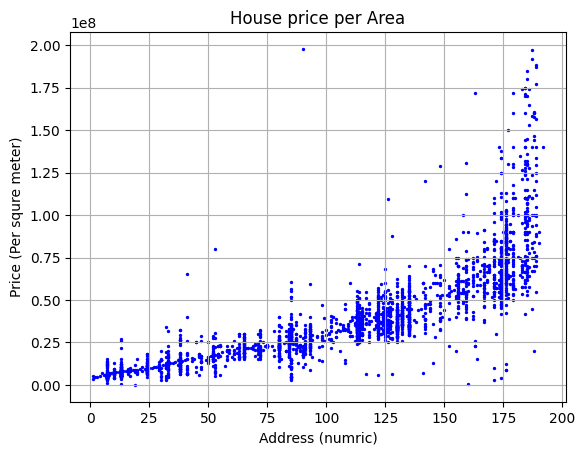

In [16]:
plt.scatter(train.Address, train.PSM, s=2, color='blue')
plt.title("House price per Area")
plt.xlabel("Address (numric)")
plt.ylabel("Price (Per squre meter)")
plt.grid(True)
plt.show()

### Step 1: Data normalization

In [17]:
def anyarray(Data):
    Data_x = np.asanyarray(Data[["Address"]])
    Data_y = np.asanyarray(Data[["PSM"]])
    # Lets normalize our data
    Normalx =Data_x/max(Data_x)
    Normaly =Data_y/max(Data_y)
    return Normalx, Normaly

### Step 2: Model Training

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x, train_y = anyarray(train)
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
clf = linear_model.LinearRegression()
train_y_hat = clf.fit(train_x_poly, train_y)
popt = clf.coef_[0]

print(" beta_0 = %.2f, beta_1 = %.2f, beta_2 = %.2f, beta_3 = %.2f" % (popt[0], popt[1], popt[2], popt[3]))

 beta_0 = 0.00, beta_1 = 0.68, beta_2 = -1.42, beta_3 = 1.27


### Step 3: Model Prediction

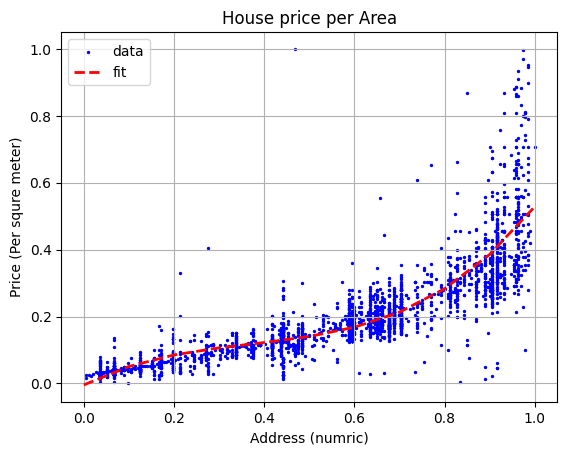

In [19]:
plt.scatter(train_x, train_y, s=2, color='blue', label='data')
X = np.arange(0.0, 1.1, 0.1)
Y = clf.intercept_[0] + popt[1]*X + popt[2]*np.power(X, 2) + popt[3]*np.power(X, 3)
plt.plot(X, Y, '--r', linewidth=2, label='fit')
plt.title("House price per Area")
plt.xlabel("Address (numric)")
plt.ylabel("Price (Per squre meter)")
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Step 4: Model Evaluation

In [20]:
from sklearn.metrics import r2_score

test_x, test_y = anyarray(test)
test_x_poly = poly.fit_transform(test_x)
test_y_hat = clf.predict(test_x_poly)

print("Mean absolute error: %.4f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Mean squares  error: %.4f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_hat ) )

Mean absolute error: 0.0435
Mean squares  error: 0.0053
R2-score: 0.78


#### * we decide to use the mean price of each area as the candidate for that place

In [21]:
def Mean_func(dataframe):
    unique_add = dataframe["Address"].unique()
    Add = []
    Mean = []
    for i in unique_add:
        df_temp = dataframe[dataframe["Address"] == i]
        mean = df_temp["PSM"].mean()
        Add.append(i)
        Mean.append(mean)
    per_area = pd.DataFrame({'Address': Add, 'PSM': Mean})
    per_area = per_area.sort_values(by='PSM')
    x, y = anyarray(per_area)
    return x, y

#### * Make our model

In [22]:
def Model(train_x, train_y):
    poly = PolynomialFeatures(degree=3)
    train_x_poly = poly.fit_transform(train_x)
    reg = linear_model.LinearRegression()
    train_y_hat = reg.fit(train_x_poly, train_y)
    return reg

#
## Parking effect

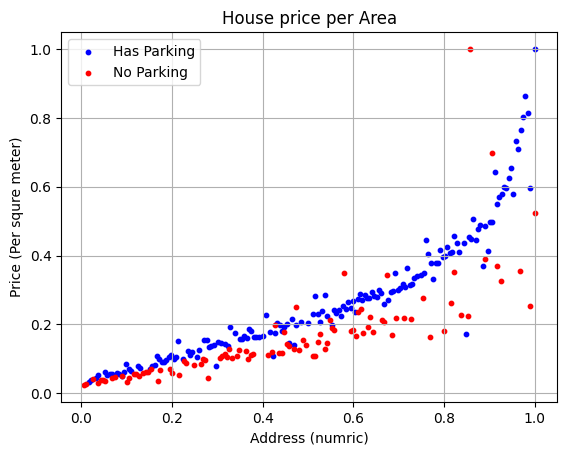

In [23]:
True_p = train[train["Parking"] == 1]
False_p = train[train["Parking"] == 0]
tp_x, tp_y = Mean_func(True_p)
fp_x, fp_y = Mean_func(False_p)
plt.scatter(tp_x, tp_y, s=10, color='blue', label='Has Parking')
plt.scatter(fp_x, fp_y, s=10, color='red', label='No Parking')
plt.title("House price per Area")
plt.xlabel("Address (numric)")
plt.ylabel("Price (Per squre meter)")
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Step 1: Model Training

In [24]:
X = np.arange(0.0, 1.1, 0.1)
tp_reg = Model(tp_x, tp_y)
fp_reg = Model(fp_x, fp_y)
Yt = tp_reg.intercept_[0] + tp_reg.coef_[0][1]*X + tp_reg.coef_[0][2]*np.power(X, 2) + tp_reg.coef_[0][3]*np.power(X, 3)
Yf = fp_reg.intercept_[0] + fp_reg.coef_[0][1]*X + fp_reg.coef_[0][2]*np.power(X, 2) + fp_reg.coef_[0][3]*np.power(X, 3)

### step 2: Model Prediction

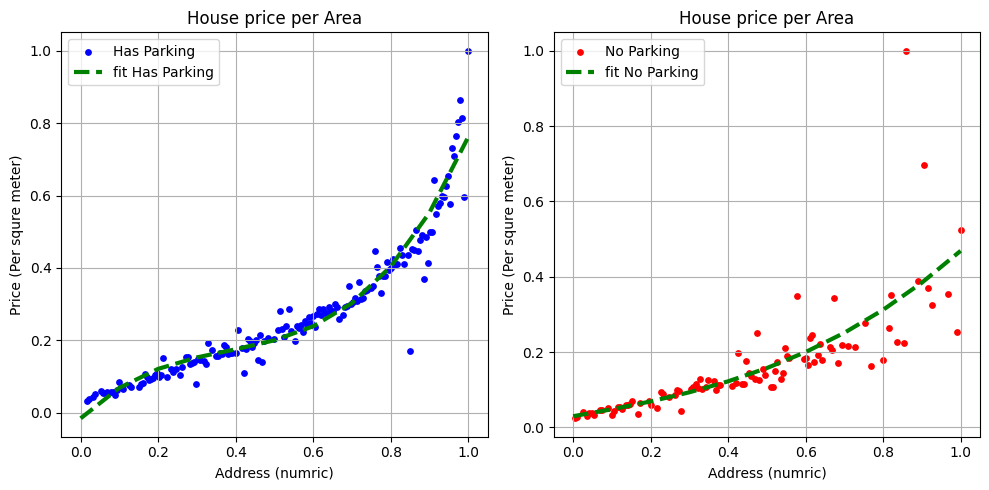

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(tp_x, tp_y, s=15, color='blue', label='Has Parking')
plt.plot(X, Yt, '--g', linewidth=3, label='fit Has Parking')
plt.title("House price per Area")
plt.xlabel("Address (numric)")
plt.ylabel("Price (Per squre meter)")
plt.legend(loc='best')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(fp_x, fp_y, s=15, color='red', label='No Parking')
plt.plot(X, Yf, '--g', linewidth=3, label='fit No Parking')
plt.title("House price per Area")
plt.xlabel("Address (numric)")
plt.ylabel("Price (Per squre meter)")
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

#
## Warehouse effect

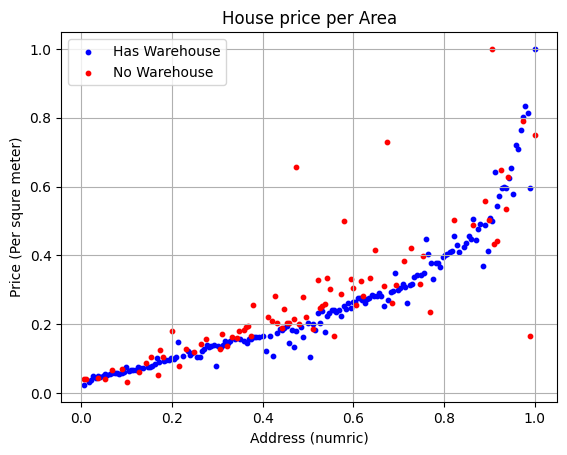

In [26]:
True_W = train[train["Warehouse"] == 1]
False_W = train[train["Warehouse"] == 0]
tw_x, tw_y = Mean_func(True_W)
fw_x, fw_y = Mean_func(False_W)
plt.scatter(tw_x, tw_y, s=10, color='blue', label='Has Warehouse')
plt.scatter(fw_x, fw_y, s=10, color='red', label='No Warehouse')
plt.title("House price per Area")
plt.xlabel("Address (numric)")
plt.ylabel("Price (Per squre meter)")
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Step 1: Model Training

In [27]:
X = np.arange(0.0, 1.1, 0.1)
tw_reg = Model(tw_x, tw_y)
fw_reg = Model(fw_x, fw_y)
Yt = tw_reg.intercept_[0] + tw_reg.coef_[0][1]*X + tw_reg.coef_[0][2]*np.power(X, 2) + tw_reg.coef_[0][3]*np.power(X, 3)
Yf = fw_reg.intercept_[0] + fw_reg.coef_[0][1]*X + fw_reg.coef_[0][2]*np.power(X, 2) + fw_reg.coef_[0][3]*np.power(X, 3)

### step 2: Model Prediction

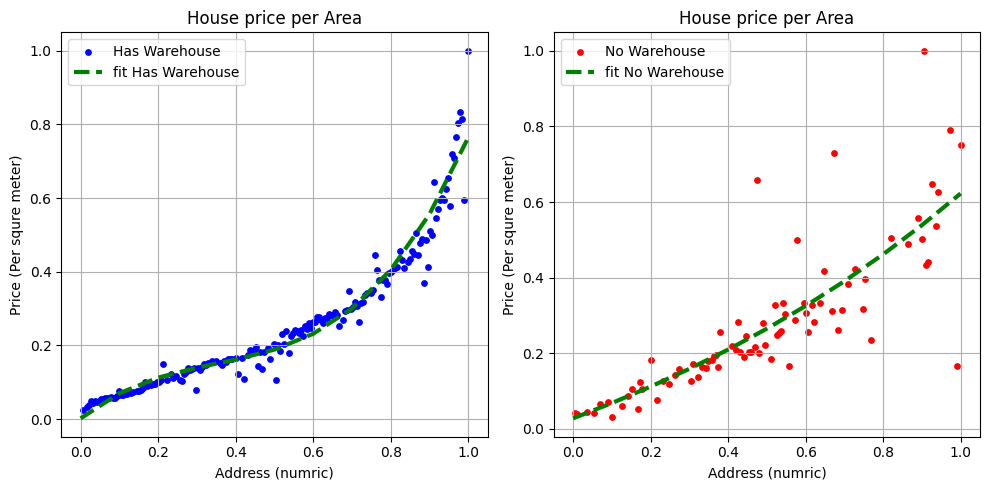

In [28]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(tw_x, tw_y, s=15, color='blue', label='Has Warehouse')
plt.plot(X, Yt, '--g', linewidth=3, label='fit Has Warehouse')
plt.title("House price per Area")
plt.xlabel("Address (numric)")
plt.ylabel("Price (Per squre meter)")
plt.legend(loc='best')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(fw_x, fw_y, s=15, color='red', label='No Warehouse')
plt.plot(X, Yf, '--g', linewidth=3, label='fit No Warehouse')
plt.title("House price per Area")
plt.xlabel("Address (numric)")
plt.ylabel("Price (Per squre meter)")
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

#
## Elevator effect

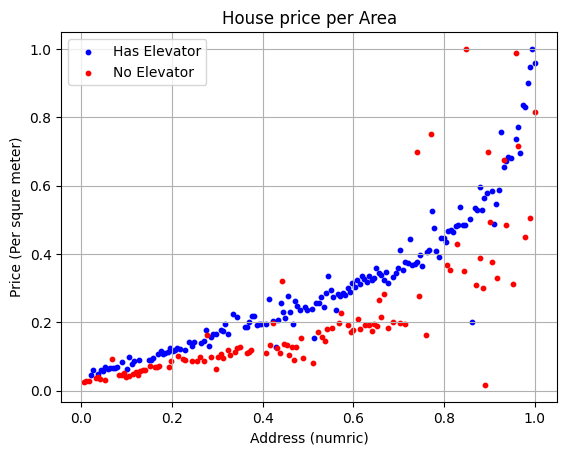

In [29]:
True_E = train[train["Elevator"] == 1]
False_E = train[train["Elevator"] == 0]
te_x, te_y = Mean_func(True_E)
fe_x, fe_y = Mean_func(False_E)
plt.scatter(te_x, te_y, s=10, color='blue', label='Has Elevator')
plt.scatter(fe_x, fe_y, s=10, color='red', label='No Elevator')
plt.title("House price per Area")
plt.xlabel("Address (numric)")
plt.ylabel("Price (Per squre meter)")
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Step 1: Model Training

In [30]:
X = np.arange(0.0, 1.1, 0.1)
te_reg = Model(te_x, te_y)
fe_reg = Model(fe_x, fe_y)
Yt = te_reg.intercept_[0] + te_reg.coef_[0][1]*X + te_reg.coef_[0][2]*np.power(X, 2) + te_reg.coef_[0][3]*np.power(X, 3)
Yf = fe_reg.intercept_[0] + fe_reg.coef_[0][1]*X + fe_reg.coef_[0][2]*np.power(X, 2) + fe_reg.coef_[0][3]*np.power(X, 3)

### Step 2: Model Prediction

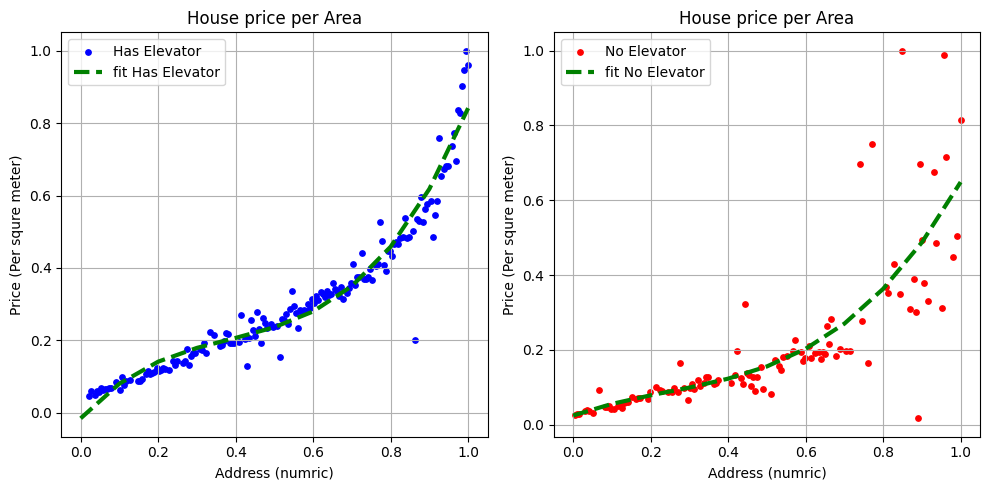

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(te_x, te_y, s=15, color='blue', label='Has Elevator')
plt.plot(X, Yt, '--g', linewidth=3, label='fit Has Elevator')
plt.title("House price per Area")
plt.xlabel("Address (numric)")
plt.ylabel("Price (Per squre meter)")
plt.legend(loc='best')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(fe_x, fe_y, s=15, color='red', label='No Elevator')
plt.plot(X, Yf, '--g', linewidth=3, label='fit No Elevator')
plt.title("House price per Area")
plt.xlabel("Address (numric)")
plt.ylabel("Price (Per squre meter)")
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

# Result

####  clf  : predict price whitout Parkind,Wearhouse,Elevator effect
#### tp_reg: predict price whit parking effect
#### fp_reg: predict price whitout parking effect
#### tw_reg: predict price whit Wearhouse effect
#### fw_reg: predict price whitout Wearhouse effect
#### te_reg: predict price whit Elevator effect
#### fe_reg: predict price whitout Elevator effect